# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
table = soup.find('table')

# Step 2: Find all rows in the table
rows = table.find_all('tr') 

# Step 3: Extract data from each row
data = []  # List to store extracted rows
for row in rows:
    # Get all columns (cells) in the current row
    columns = row.find_all('tr')  # Use 'th' if the table has header cells

    # Extract text from each column
    row_data = [col.get_text(strip=True) for col in columns]

    # Append non-empty rows to the data list
    if row_data:
        data.append(row_data)

# Step 4: Output the extracted data
for row in data:
    print(row)


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
rows_list = []

# Step 2: Find all rows in the table (excluding headers)
table = soup.find('table')  # Locate the table
rows = table.find_all('tr')  # Extract all rows (header + data rows)

# Loop through the scraped data to create a list of rows
for row in rows[1:]:  # Skip the first row (headers)
    # Find all columns (cells) in the row
    columns = row.find_all('td')
    
    # Extract text from each column and store in a list
    row_data = [col.get_text(strip=True) for col in columns]
    
    # Append the row data to the list if it's not empty
    if row_data:
        rows_list.append(row_data)

# Step 4: Output the list of rows
print(rows_list)


[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], ['172

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Step 1: Define the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Step 2: Create the DataFrame
df = pd.DataFrame(rows_list, columns=column_names)

# Confirm DataFrame was created successfully
df


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
# Step 1: Convert the relevant columns to numeric types
df['sol'] = pd.to_numeric(df['sol'], errors='coerce')  # Convert 'sol' to numeric, any errors will become NaN
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')  # Convert 'min_temp' to numeric
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')  # Convert 'pressure' to numeric

# Step 2: Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'], errors='coerce')

# Step 3: Convert 'id', 'ls', and 'month' to categorical or string types (if necessary)
df['id'] = df['id'].astype(str)  # If 'id' is supposed to be treated as a string (e.g., an identifier)
df['ls'] = df['ls'].astype(int, errors='ignore')  # Convert 'ls' to integer
df['month'] = df['month'].astype(int, errors='ignore')  # Convert 'month' to integer


In [11]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
# Step 1: Check the unique months in the dataset
unique_months = df['month'].nunique()  # Count the unique values in the 'month' column
unique_months


12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
# Step 1: Count the unique number of sols (Martian days)
unique_sols = df['sol'].nunique()  # Count unique values in the 'sol' column
unique_sols


1867

In [14]:
# 3. What is the average minimum temperature by month?
# Step 1: Group the data by 'month' and calculate the average minimum temperature ('min_temp')
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Step 2: Display the result
print("Average minimum temperature by month:")
print(avg_min_temp_by_month)


Average minimum temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


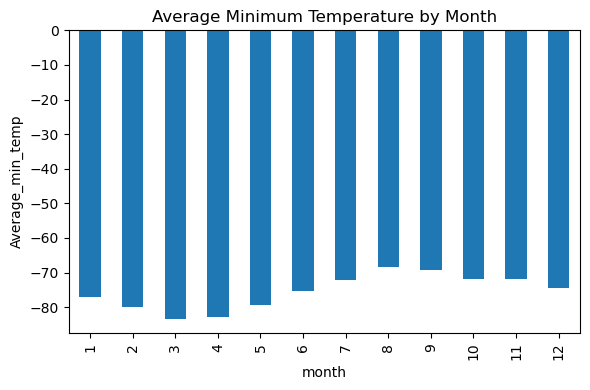

In [15]:
# Plot the average minimum temperature by month
AVG_TEMP = avg_min_temp_by_month.plot(kind='bar', figsize=(6,4))
# Set the xlabel and ylabel using class methods
plt.title('Average Minimum Temperature by Month')
AVG_TEMP.set_xlabel("month")
AVG_TEMP.set_ylabel("Average_min_temp")

#plt.show()
plt.tight_layout()

In [16]:
# Group by 'month' and calculate the average minimum temperature
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Sort the result in ascending order
avg_min_temp_by_month_sorted = avg_min_temp_by_month.sort_values(ascending=True)

# Display the sorted values
print(avg_min_temp_by_month_sorted)


month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


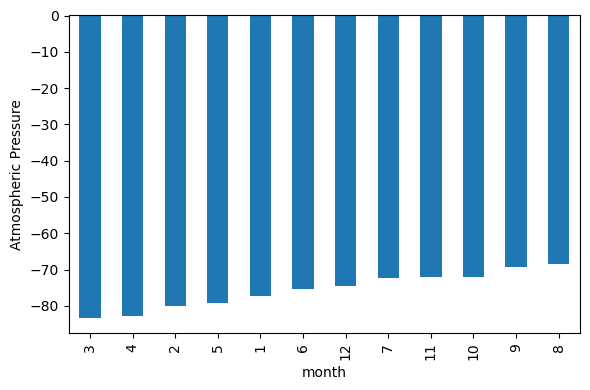

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
AVG_chart = avg_min_temp_by_month_sorted.plot(kind='bar', figsize=(6,4))

# Set the xlabel and ylabel using class methods
AVG_chart.set_xlabel("month")
AVG_chart.set_ylabel("Atmospheric Pressure")

#plt.show()
plt.tight_layout()

In [18]:
# 4. What is the average pressure by month?
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Step 2: Display the result
print("Average atmospheric pressure by month:")
print(avg_pressure_by_month)


Average atmospheric pressure by month:
month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


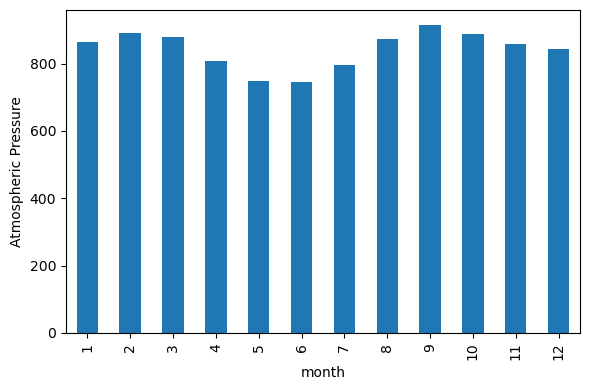

In [19]:
# Plot the average pressure by month
AVG_chart = avg_pressure_by_month.plot(kind='bar', figsize=(6,4))

# Set the xlabel and ylabel using class methods
AVG_chart.set_xlabel("month")
AVG_chart.set_ylabel("Atmospheric Pressure")

#plt.show()
plt.tight_layout()

In [20]:
# Group by 'month' and calculate the average minimum temperature
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

# Sort the result in ascending order
avg_pressure_by_month_sorted = avg_pressure_by_month.sort_values(ascending=True)

# Display the sorted values
print(avg_pressure_by_month_sorted)


month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


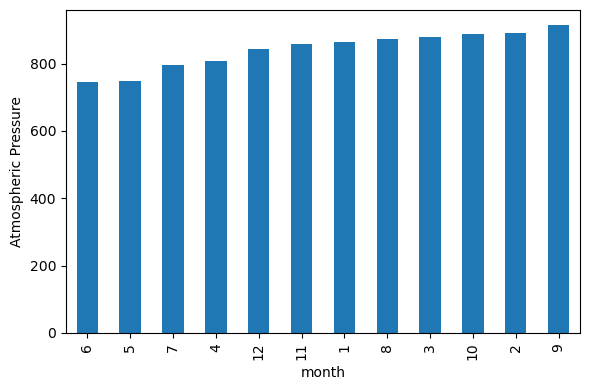

In [21]:
# Plot the average pressure by month
AVG_chart = avg_pressure_by_month_sorted.plot(kind='bar', figsize=(6,4))

# Set the xlabel and ylabel using class methods
AVG_chart.set_xlabel("month")
AVG_chart.set_ylabel("Atmospheric Pressure")

#plt.show()
plt.tight_layout()

In [22]:
# Assuming 'terrestrial_date' is the datetime column in the DataFrame
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Extract the day of the month
df['day'] = df['terrestrial_date'].dt.day

# Display the updated DataFrame
print(df.head())


   id terrestrial_date  sol   ls  month  min_temp  pressure  day
0   2       2012-08-16   10  155      6     -75.0     739.0   16
1  13       2012-08-17   11  156      6     -76.0     740.0   17
2  24       2012-08-18   12  156      6     -76.0     741.0   18
3  35       2012-08-19   13  157      6     -74.0     732.0   19
4  46       2012-08-20   14  157      6     -74.0     740.0   20


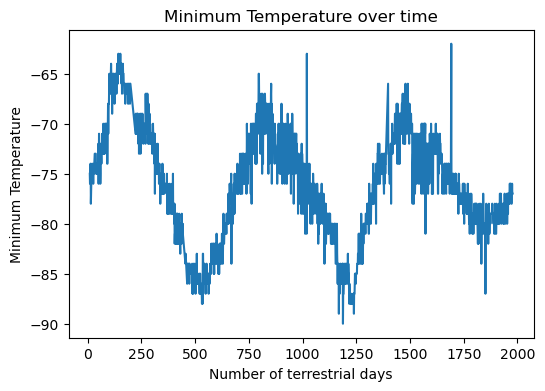

In [23]:
# Plot the daily minimum temperature against the Martian sols (days)
plt.figure(figsize=(6, 4))
plt.plot(df['sol'], df['min_temp'])
plt.title('Minimum Temperature over time')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')

# Show the plot to visually estimate the periodicity
plt.show()


#### Minimum Temperature

YOUR ANALYSIS HERE

In [24]:
# Calculate the minimum temperature
min_temp = df['min_temp'].min()

print(f"The minimum temperature recorded is {min_temp}°C.")


The minimum temperature recorded is -90.0°C.


#### Atmospheric Pressure

YOUR ANALYSIS HERE

In [27]:
# Calculate basic statistics for atmospheric pressure
min_pressure = df['pressure'].min()
max_pressure = df['pressure'].max()
avg_pressure = df['pressure'].mean()

print(f"Minimum Atmospheric Pressure: {min_pressure} Pa")
print(f"Maximum Atmospheric Pressure: {max_pressure} Pa")
print(f"Average Atmospheric Pressure: {avg_pressure:.2f} Pa")


Minimum Atmospheric Pressure: 727.0 Pa
Maximum Atmospheric Pressure: 925.0 Pa
Average Atmospheric Pressure: 841.07 Pa


#### Year Length

YOUR ANALYSIS HERE

In [28]:
import numpy as np
from scipy.signal import find_peaks

# Find peaks in the minimum temperature data
peaks, _ = find_peaks(df['min_temp'])

# Extract the sols corresponding to the peaks
peak_sols = df['sol'].iloc[peaks]

# Calculate differences between consecutive peaks
differences = np.diff(peak_sols)

# Average difference (length of a Martian year in sols)
martian_year_length = np.mean(differences)

print(f"Estimated length of a Martian year: {martian_year_length:.2f} sols")


Estimated length of a Martian year: 4.00 sols


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [29]:
# Write the data to a CSV
file_name = "mars_temperature_data.csv"
df.to_csv(file_name, index=False)

# Step 3: Confirm the file is saved
print(f"Data has been written to {file_name}")

Data has been written to mars_temperature_data.csv


In [30]:
browser.quit()